In [2]:
import numpy as np
import pandas as pd
from geopy.distance import geodesic

In [3]:
data = pd.read_csv('uber.csv').iloc[:, [2,4,5,6,7,8]].dropna()
# latがおかしいのがあるので除外
data = data[data['pickup_latitude'] >= -90]
data = data[data['pickup_latitude'] <= 90]
data = data[data['dropoff_latitude'] >= -90]
data = data[data['dropoff_latitude'] <= 90]

print(data[:5])

   fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          7.5        -73.999817        40.738354         -73.999512   
1          7.7        -73.994355        40.728225         -73.994710   
2         12.9        -74.005043        40.740770         -73.962565   
3          5.3        -73.976124        40.790844         -73.965316   
4         16.0        -73.925023        40.744085         -73.973082   

   dropoff_latitude  passenger_count  
0         40.723217                1  
1         40.750325                1  
2         40.772647                1  
3         40.803349                3  
4         40.761247                5  


In [4]:
def calc_distance(df):
    return geodesic((df['pickup_latitude'], df['pickup_longitude']), (df['dropoff_latitude'], df['dropoff_longitude'])).m
data['distance'] = data.apply(calc_distance, axis=1)
data = data[['fare_amount', 'distance', 'passenger_count']]
print(data[:5])

   fare_amount     distance  passenger_count
0          7.5  1681.110742                1
1          7.7  2454.363240                1
2         12.9  5039.602684                1
3          5.3  1661.441524                3
4         16.0  4483.730087                5


In [5]:
from scipy import stats
# normalized_data = pd.DataFrame(stats.zscore(data), index=data.index, columns=data.columns)
normalized_data = data - data.mean()
print(normalized_data[:5])

   fare_amount      distance  passenger_count
0    -3.859865 -19031.170360        -0.684546
1    -3.659865 -18257.917863        -0.684546
2     1.540135 -15672.678418        -0.684546
3    -6.059865 -19050.839578         1.315454
4     4.640135 -16228.551015         3.315454


In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(normalized_data)

print(f'寄与値: {pca.explained_variance_ratio_}')
print(f'固有ベクトル: {pca.singular_values_}')

data_on_pca = pca.transform(data)

寄与値: [9.99999999e-01 6.76695736e-10]
固有ベクトル: [1.70174927e+08 4.42682439e+03]


False


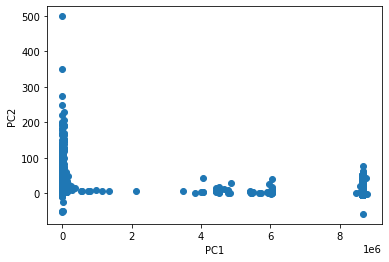

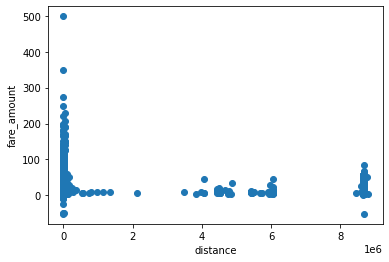

In [10]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='PC1', ylabel='PC2')
ax.scatter(data_on_pca[:, 0], data_on_pca[:, 1])

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='distance', ylabel='fare_amount')
ax.scatter(data['distance'], data['fare_amount'])